# Principal Component Analysis

## Wednesday January 20 2016


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

In [2]:
# Load in the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [10]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n    

C:\Users\Angus\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


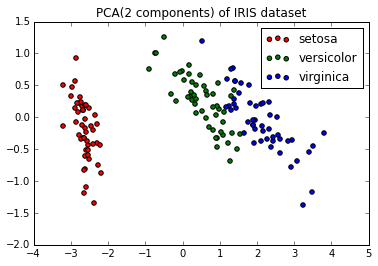

In [3]:
#############################
### PCA with 2 components  ##
#############################


pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X)

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')


In [17]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(pca[y == i, 0], pca[y == i, 1], c=c, label=target_name)
plt.legend()

TypeError: 'PCA' object has no attribute '__getitem__'

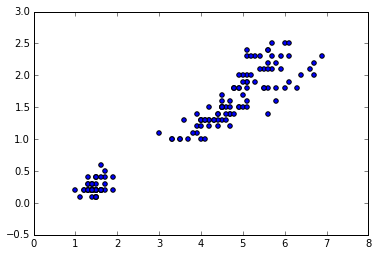

In [4]:

X_transformedSK = pca.transform(X)
# only 2 columns!!

X_reconstituted = pca.inverse_transform(X_transformedSK)
# Turn it back into its 4 column using only 2 principal components

plt.scatter(X[:,2], X[:,3])

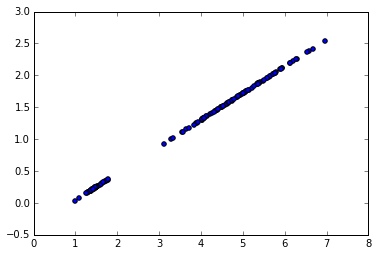

In [5]:
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])

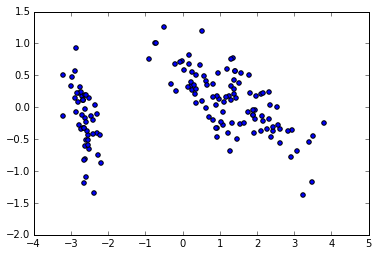

In [25]:
#############################
### PCA with 3 components  ##
#############################
plt.cla()
# EXERCISE: change the line below to run the analysis
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_3 = pca.transform(X)

X_3

X_reconstituted = pca.inverse_transform(X_3)

# Graph the reconstituted Data set
plt.scatter(X_3[:,0], X_3[:,1])


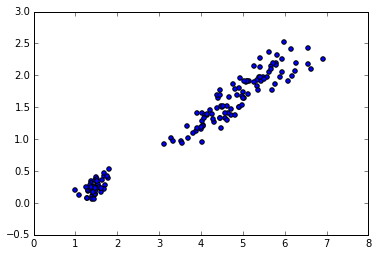

In [11]:
# EXERCISE
# Graph the new projection on reconstituated data
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])


explained variance ratio (first two components): [ 0.92461621  0.05301557  0.01718514  0.00518309]


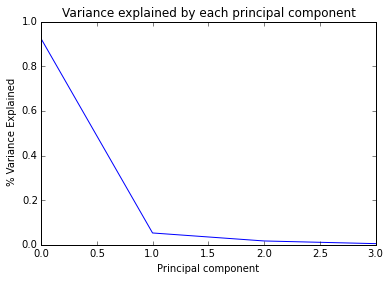

In [16]:
#############################
### choosing components  ####
#############################



pca = decomposition.PCA(n_components=4)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.cla()
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')
